### It's a Drag


(dv) = (ve)ln(m0/mf) - g (dt)
Where:
- (ve) = Isp(g0) is the effective exhaust volume
    - Isp = specific impulse in seconds
    - ve is the specific impulse measured in m/s
    - g0 = gravity constant = 9.80665 m/s^2
- m0 = initial total mass including propellant (wet mass)
- mf = final mass without propellant (dry mass)
- dv = desired delta V (escape velocity, etc)
- dt = fuel burn time

https://history.nasa.gov/SP-4029/Apollo_18-23b_Launch_Vehicle_Propellant_Use.htm
ground ignition weights: https://history.nasa.gov/SP-4029/Apollo_18-19_Ground_Ignition_Weights.htm

gravity force (g) dependent on distance from surface (r)
distance from surface (r) dependent on time (t) and velocity(v)

### Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Define Variables

In [3]:

isp = 263
mdot = 12580 # fuel burn rate in kg/s
#wet_mass = 2280000 - mdot(t) #AS FUNCTION #kg wet mass is a function of time
#dry_mass = 2800000 - 137000 #kg stage 1
dt = 168 #s burn time
#ve = isp * g
#dv = ve * np.log(wet_mass/dry_mass) - (g * dt)
#print(dv)


G = 6.6743 * (10**(-11)) #(m**3)/(kg * (s**2)) # gravitational constant
M = 5.972 * (10**24) #kg #mass of earth
sea_level = (6371 * 1000) #m
#r = (6371 * 1000) * v(t)
#g = (G * M)/(d**2) #d formerly r
burntime = 162
mdot = 12580
wetmass = 2280000 #kg
drymass = 130000 #kg

### Gravity Force by Altitude Reference Values
- Altitude as Key

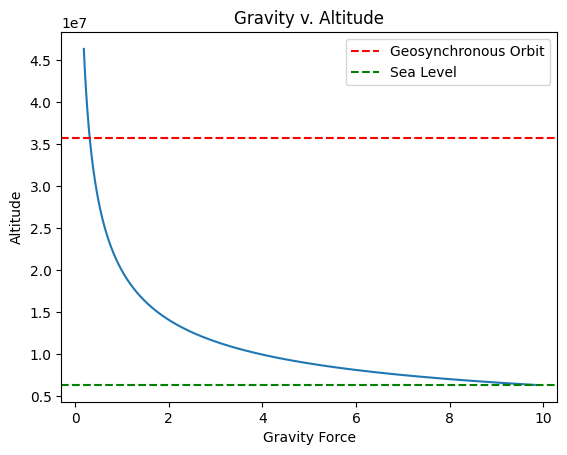

In [5]:
key_grav_values = {}
altitude_limit = (40000 * 1000) + sea_level #m
altitude_range = range(sea_level, altitude_limit, 1000)
for d in altitude_range:
    g = (G * M)/(d**2)
    key_grav_values[d] = g
#print(key_grav_values)

plot_alt = list(key_grav_values.keys())
plot_g = list(key_grav_values.values())
plt.plot(plot_g, plot_alt)
plt.xlabel('Gravity Force')
plt.ylabel('Altitude')
plt.title('Gravity v. Altitude')
plt.axhline(y = 35786000, color = 'r', linestyle = '--', label = 'Geosynchronous Orbit')
plt.axhline(y = sea_level, color = 'g', linestyle = '--', label = 'Sea Level')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')


### Gravity (g) call function
- To return gravity force by altitude
- Using established Dict

In [10]:
def gravity_force(d): #in km
    return key_grav_values[d]

#gravity_force(35786)

### Ve by Altitude

In [11]:
key_ve = {}
for i in altitude_range:
    ve = isp * gravity_force(i)
    key_ve[i] = ve
print(key_ve)

{6371000: 2582.6530110970925, 6372000: 2581.8424491527394, 6373000: 2581.0322687390703, 6374000: 2580.222469616674, 6375000: 2579.4130515463285, 6376000: 2578.6040142889974, 6377000: 2577.7953576058344, 6378000: 2576.987081258178, 6379000: 2576.1791850075547, 6380000: 2575.3716686156777, 6381000: 2574.5645318444476, 6382000: 2573.7577744559503, 6383000: 2572.9513962124593, 6384000: 2572.145396876433, 6385000: 2571.339776210517, 6386000: 2570.534533977542, 6387000: 2569.7296699405247, 6388000: 2568.925183862667, 6389000: 2568.1210755073557, 6390000: 2567.3173446381643, 6391000: 2566.5139910188504, 6392000: 2565.7110144133544, 6393000: 2564.908414585805, 6394000: 2564.1061913005124, 6395000: 2563.3043443219726, 6396000: 2562.502873414865, 6397000: 2561.701778344053, 6398000: 2560.901058874584, 6399000: 2560.1007147716887, 6400000: 2559.3007458007814, 6401000: 2558.5011517274593, 6402000: 2557.701932317503, 6403000: 2556.903087336877, 6404000: 2556.104616551726, 6405000: 2555.306519728378

### Ve Call Function

In [ ]:
def dyn_ve(g):
    return isp*gravity_force

### Wet Mass by Time
- Time as Key

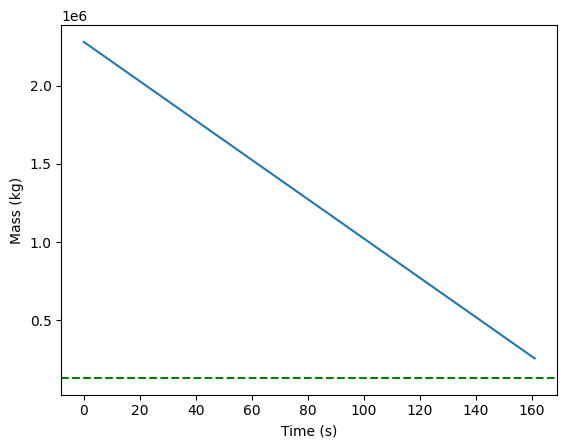

In [40]:
# function for wet mass by time
burntime_range = range(0, burntime, 1)
key_wet_mass = {}
for t in burntime_range:
    wm = wetmass - (mdot * t)
    key_wet_mass[t] = wm
#print(key_wet_mass)
plot_mass_time = list(key_wet_mass.keys())
plot_mass_wet = list(key_wet_mass.values())
plt.plot(plot_mass_time, plot_mass_wet)
plt.xlabel('Time (s)')
plt.ylabel('Mass (kg)')
plt.axhline(y = drymass, color = 'g', linestyle = '--', label = 'Dry Mass')

### Mass (m) Call Function

In [41]:
def dyn_mass(t):
    return key_wet_mass[t]

### Velocity Function
- As a function of time (burntime)
- As an input to Distance Function

In [28]:
# function for wet mass by time
burntime_range = range(0, burntime, 1)
key_wet_mass = {}
for t in burntime_range:
    wm = wetmass - (mdot * t)
    key_wet_mass[t] = wm[t]
print(key_wet_mass)







'''
def wet_mass_by_time(burntime):
    wet_mass_list = []
    for i in range(0, burntime + 1):
        wm = 2928944.218 - (mdot * i) #total wet mass of all stages
        wet_mass_list.append(wm)
    return wet_mass_list
#burntime = 150
mdot = 12580
wet_mass_list = wet_mass_by_time(burntime)
plt.plot(range(burntime + 1), wet_mass_list)
plt.xlabel(' Burn Time')
plt.ylabel('Wet Mass')
plt.title('Wet Mass versus Burn Time')
print(wet_mass_list[150])

SyntaxError: incomplete input (2859696420.py, line 15)

In [ ]:
key_velocity = {}
for t in burntime_range:
    key_velocity[t] = ve * np.log(wet_mass/dry_mass) - (g * t)

In [27]:
# Function for velocity by time
def velocity_by_time(t): #aka vt(t)
    v = ve * np.log(wet_mass/dry_mass) - (g * t)
velocity_by_time = []
t = 0
for t in range(0, 264):
    t += 1
    v = ve * np.log(wet_mass/dry_mass) - (g * t)
    velocity_by_time.append(v)
print(velocity_by_time, max(velocity_by_time))

NameError: name 'wet_mass' is not defined

### Distance Function WIP
As a function of velocity (v) and time (t)

To calculate gravity force (g)

In [ ]:
def y_distance(v,t):
    for i in range(0,burntime)

In [7]:
xpoints = np.array([0, dt])
ypoints = np.array([0, dv])

plt.plot(xpoints, ypoints)
plt.show()

NameError: name 'dv' is not defined

https://www.youtube.com/watch?time_continue=17&v=zwf3vMVqKXo&embeds_referring_euri=https%3A%2F%2Fwww.reddit.com%2F&feature=emb_logo

https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid19.ipynb